In [1]:
#from time import time
import time
from scipy import sparse
from scipy import linalg

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

from sklearn.model_selection import GridSearchCV


# Dense vs sparse comparison

In [2]:
X, y = make_regression(n_samples=200, n_features=5000, random_state=0)
# create a copy of X in sparse format
X_sp = sparse.coo_matrix(X)

alpha = 1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)

t0 = time()
sparse_lasso.fit(X_sp, y)
print(f"Sparse Lasso done in {(time() - t0):.3f}s")

t0 = time()
dense_lasso.fit(X, y)
print(f"Dense Lasso done in {(time() - t0):.3f}s")

# compare the regression coefficients
coeff_diff = linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_)
print(f"Distance between coefficients : {coeff_diff:.2e}")

TypeError: 'module' object is not callable

In [3]:
# make a copy of the previous data
Xs = X.copy()
# make Xs sparse by replacing the values lower than 2.5 with 0s
Xs[Xs < 2.5] = 0.0
# create a copy of Xs in sparse format
Xs_sp = sparse.coo_matrix(Xs)
Xs_sp = Xs_sp.tocsc()

# compute the proportion of non-zero coefficient in the data matrix
print(f"Matrix density : {(Xs_sp.nnz / float(X.size) * 100):.3f}%")

alpha = 0.1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)

t0 = time()
sparse_lasso.fit(Xs_sp, y)
print(f"Sparse Lasso done in {(time() - t0):.3f}s")

t0 = time()
dense_lasso.fit(Xs, y)
print(f"Dense Lasso done in  {(time() - t0):.3f}s")

# compare the regression coefficients
coeff_diff = linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_)
print(f"Distance between coefficients : {coeff_diff:.2e}")

Matrix density : 0.626%
Sparse Lasso done in 0.124s
Dense Lasso done in  0.725s
Distance between coefficients : 8.78e-12


# Diabetes dataset

In [ ]:
#Original dataset

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)

D = X.shape[1]

X_train = X[:150]
y_train = y[:150]
X_val = X[150:200]
y_val = y[150:200]

alpha = 0.1

#lasso = Lasso(alpha=alpha,random_state=0, max_iter=10000)

#t0 = time()
#lasso.fit(X, y)
#print(f"Lasso done in {(time() - t0):.3f}s")

(442, 10)


In [3]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-5, 0, 50)

scores_train = []
scores_val = []

for i in range(len(alphas)):
    print(i)
    lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_train_pred = np.matmul(X_train,lasso.coef_)
    y_val_pred = np.matmul(X_val,lasso.coef_)
    r2_train = lasso.score(X_train,y_train)
    r2_val = lasso.score(X_val,y_val)
    sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)
    
    one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))
    
    #scores.append(r2_val)
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #scores_train.append(sqloss_train)
    #scores_val.append(sqloss_val)
    
    print(lasso.coef_)
    print(r2_val)
    print(one_norm)
    print(zero_norm)
    print("\n")

0
[ -67.32913503 -369.97704733  445.9141429   324.49257323   88.46361735
 -369.81495481 -263.2966845   123.22054285  579.25818587   89.90979769]
0.390503123076718
2721.676681554177
10.0


1
[ -67.32830789 -369.97413687  445.91267352  324.49125093   88.28753183
 -369.66722331 -263.22482733  123.2286176   579.31628394   89.91128471]
0.3905141066452109
2721.342137930452
10.0


2
[ -67.3272617  -369.9704555   445.91081494  324.48957842   88.06480412
 -369.48036028 -263.13393628  123.23883142  579.38977124   89.91316564]
0.39052799853369646
2720.918979545615
10.0


3
[ -67.32593749 -369.96580096  445.9084649   324.48746234   87.78331224
 -369.24418884 -263.01906877  123.25173131  579.48264797   89.91554204]
0.39054555468736474
2720.3841568679745
10.0


4
[ -67.32426348 -369.95991182  445.90549166  324.4847864    87.42704241
 -368.94528542 -262.8736828   123.26806664  579.60019664   89.9185505 ]
0.3905677712750584
2719.707277783476
10.0


5
[ -67.32214603 -369.95246304  445.90173101  324.481

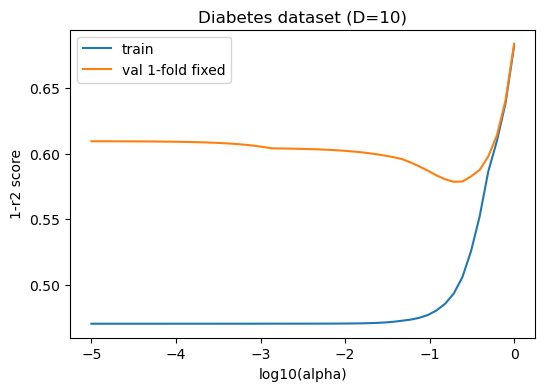

In [4]:
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
ax1.plot(np.log10(alphas),1-np.array(scores_train),label="train")
ax1.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
ax1.set_title("Diabetes dataset (D=10)")
ax1.set_xlabel("log10(alpha)")
ax1.set_ylabel("1-r2 score")
ax1.legend()
plt.show()

# Larger custom dataset

In [ ]:
#Sparse coding settings

In [2]:
np.random.seed(42)

N_train = 360
N_train_folds = 10
N_val = 720
N_test = 36
N = N_train+N_val+N_test

D = 200
D_small = 20
mu, sigma = 0, 1.0

X_all = np.random.normal(mu, sigma, size=(N,D))
X_small = np.random.normal(mu, sigma, size=(N,D_small))
w_opt = np.random.normal(mu,sigma,size=D_small)
y_all = np.matmul(X_small,w_opt)

X_all[:,:D_small] = X_small
#X_train = X_all[:N_train]
X_val = X_all[N_train:N_train+N_val]
X_test = X_all[N_train+N_val:]

y_train = y_all[:N_train]
y_val = y_all[N_train:N_train+N_val]
y_test = y_all[N_train+N_val:]

In [3]:
X_all.shape

(1116, 200)

NameError: name 'X' is not defined

In [5]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-7, 1, 20)

scores_train_arr = np.zeros((N_train_folds,20))
scores_val_arr = np.zeros((N_train_folds,20))

for j in range(N_train_folds):
    print(j)
    X_train = X_all[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    y_train = y_all[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    #X_train = X[:int(N_train/20)]
    #y_train = y[:int(N_train/20)]
    scores_train_tmp = []
    scores_val_tmp = []
    
    for i in range(len(alphas)):
        #print(i)
        lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
        lasso.fit(X_train, y_train)
        y_train_pred = np.matmul(X_train,lasso.coef_)
        y_val_pred = np.matmul(X_val,lasso.coef_)
        r2_train = lasso.score(X_train,y_train)
        r2_val = lasso.score(X_val,y_val)
        sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
        sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

        one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
        zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))

        #scores.append(r2_val)
        #scores_train_tmp.append(r2_train)
        #scores_val_tmp.append(r2_val)
        #scores_train.append(sqloss_train)
        #scores_val.append(sqloss_val)
        
        scores_train_arr[j][i] = r2_train
        scores_val_arr[j][i] = r2_val
        
        if j==0:
            print(i)
            print(lasso.coef_)
            print(r2_val)
            print(one_norm)
            print(zero_norm)
            print(y_val_pred)
            print("\n")

    #print(r2_val)
    #print(one_norm)
    #print(zero_norm)
    print("\n")
    
    #scores_train.append(np.mean(np.array(scores_train_tmp)))
    #scores_val.append(np.mean(np.array(scores_val_tmp)))
    


0
0
[-2.04373826e+00  6.42919367e-01  9.60623049e-01 -2.96310472e+00
  9.35731639e-01  1.50929138e+00  1.48491209e+00 -1.90303173e+00
 -1.17392775e+00 -5.15851702e-01 -1.85035434e+00  1.83206375e-01
  4.25540203e-01  3.54491552e-01 -1.80552879e+00  8.90972674e-01
  4.35797873e-01  1.00642562e+00 -2.51889895e-01  1.67017150e-01
 -2.62157714e-01 -3.11239036e-01  1.13307182e-01 -3.70187953e-01
 -3.73323343e-01  4.88945793e-01 -1.45952510e-01  3.79982178e-01
 -2.13760896e-01 -3.70600956e-01 -1.16387231e-03 -2.39978755e-01
  4.34694224e-02 -7.52706000e-02 -4.95222494e-01 -2.12778652e-01
  6.93287832e-02  9.36386611e-03 -2.08708364e-01 -7.99919198e-02
  5.69469874e-01  2.06467796e-01 -1.80412589e-01 -1.76139872e-02
  6.17698540e-01 -2.34352174e-01 -8.09898569e-03  5.10649877e-02
  1.34578981e-01 -3.63485094e-01 -7.69898947e-02  1.67149921e-01
  2.65840419e-01  2.52027937e-01 -1.33942696e-01  3.35159341e-02
 -1.98986145e-01  2.89894213e-01  3.35079881e-01  5.85590797e-01
 -1.54425148e-01  2.0



2


3


4


5


6


7


8


9




In [51]:
scores_val_arr

array([[ 6.48198305e-01,  6.48199022e-01,  6.48200912e-01,
         6.48205894e-01,  6.48219029e-01,  6.48253694e-01,
         6.48345094e-01,  6.49328121e-01,  8.16340289e-01,
         7.65819973e-01,  2.53518692e-01,  1.08712889e-01,
        -8.02241235e-02, -1.69543115e-01, -1.39101516e-01,
        -7.54802844e-02,  1.00896013e-01,  1.32688614e-01,
        -2.07877235e-01, -2.07877235e-01],
       [ 7.47062200e-01,  7.47062655e-01,  7.47063854e-01,
         7.47067015e-01,  7.47075347e-01,  7.47097289e-01,
         7.47154969e-01,  7.65047072e-01,  7.39666593e-01,
         4.88789300e-01,  4.28218166e-01,  4.26281897e-01,
         4.27161018e-01,  3.98816242e-01,  4.16794144e-01,
         3.77258364e-01,  3.83927267e-01,  2.26527059e-01,
        -1.56014557e-03, -1.56014557e-03],
       [ 6.10986389e-01,  6.10987701e-01,  6.10991163e-01,
         6.11000289e-01,  6.11024349e-01,  6.11087768e-01,
         6.11254848e-01,  7.72643028e-01,  8.24809634e-01,
         7.40544634e-01,  6.7

In [52]:
np.mean(scores_train_arr,axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999999, 0.99999997, 0.99999982,
       0.99999875, 0.99999143, 0.9999405 , 0.99958837, 0.99723693,
       0.98248528, 0.89922935, 0.53256547, 0.01798503, 0.        ])

In [53]:
scores_train = np.mean(scores_train_arr,axis=0)
scores_val = np.mean(scores_val_arr,axis=0)

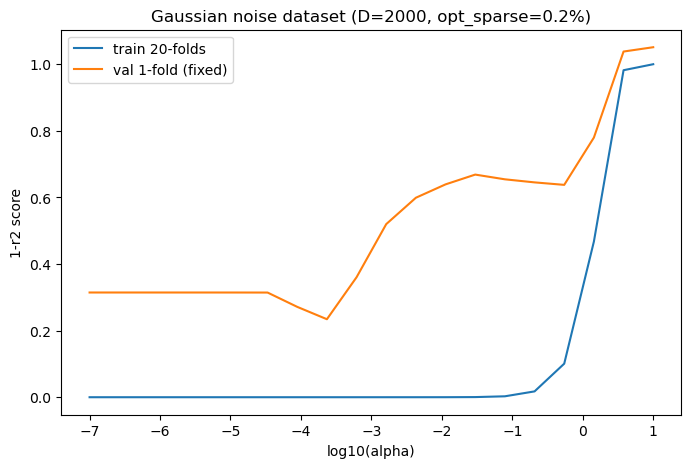

In [54]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(np.log10(alphas),1-np.array(scores_train),label="train 20-folds")
plt.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold (fixed)")
plt.title("Gaussian noise dataset (D=2000, opt_sparse=0.2%)")
plt.xlabel("log10(alpha)")
plt.ylabel("1-r2 score")
plt.legend()
plt.show()

In [56]:
y

array([-6.56290069, -7.53093045,  0.60165441, ...,  0.43961237,
        5.82271312, -4.42086093])

In [57]:
from sparse_coding_test import custom_algo

0
Anneal time taken 2.241371
1
Anneal time taken 2.269843
2
Anneal time taken 2.281360
3
Anneal time taken 2.245393
4
Anneal time taken 2.263504
5
Anneal time taken 2.233865
6
Anneal time taken 2.293817
7
Anneal time taken 2.249429
8
Anneal time taken 2.242625
9
Anneal time taken 2.261529


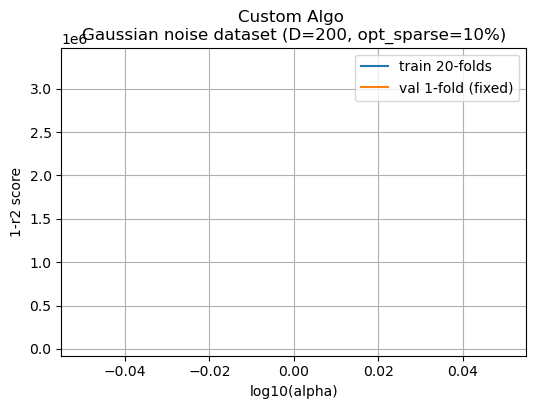

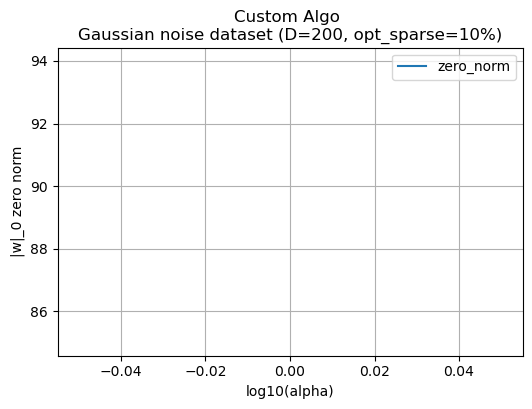

In [58]:
gamma = 0.02


N_alphas = 1

#alphas = np.logspace(-1, 2, 30)
alphas = np.array([1.0])
#alphas = np.logspace(-2.5, 1.5, N_alphas)

scores_train_arr = np.zeros((N_train_folds,N_alphas))
scores_val_arr = np.zeros((N_train_folds,N_alphas))
zn_arr = np.zeros((N_train_folds,N_alphas))

for j in range(N_train_folds):
    print(j)
    X_train = X_all[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    y_train = y_all[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]

    X_train_mean = np.mean(X_train,axis=0)
    X_train_std = np.std(X_train,axis=0)
    y_train_mean = np.mean(y_train)
    y_train_std = np.std(y_train)

    X_train_normed = (X_train-X_train_mean)/X_train_std
    y_train_normed = (y_train-y_train_mean)/y_train_std

    for i in range(len(alphas)):
        #print(i)
        #print("alpha= %f"%alphas[i])

        time_start = time.time()
        mw = custom_algo(X_train_normed,y_train_normed,alphas[i],gamma)

        print("Anneal time taken %f"%(time.time()-time_start))

        y_train_pred = np.matmul(X_train,mw)*y_train_std+y_train_mean
        y_val_pred = np.matmul(X_val,mw)*y_train_std+y_train_mean

        SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
        SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

        SStot_train = np.dot(np.mean(y_train)-y_train,np.mean(y_train)-y_train)
        SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

        r2_train = 1-SSres_train/SStot_train
        r2_val = 1-SSres_val/SStot_val

        one_norm = np.matmul(np.abs(mw),np.ones(D))
        zero_norm = np.matmul(np.where(np.abs(mw)>0,1,0),np.ones(D))

        scores_train_arr[j][i] = r2_train
        scores_val_arr[j][i] = r2_val
        zn_arr[j][i] = zero_norm

scores_train = np.mean(scores_train_arr,axis=0)
scores_val = np.mean(scores_val_arr,axis=0)
zn = np.mean(zn_arr,axis=0)

#print("m*w= %s"%(str(mw)))
#print("r2_val= %f"%r2_val)
#print("sqloss_val= %f"%SSres_val)
#print("one_norm= %f"%one_norm)
#print("zero_norm= %f"%zero_norm)
#print("\n")

fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
#ax2.plot(np.log10(alphas),1-np.array(scores_train),label="train")
#ax2.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
ax2.plot(np.log10(alphas),1-np.array(scores_train),label="train 20-folds")
ax2.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold (fixed)")
ax2.set_title("Custom Algo \nGaussian noise dataset (D=200, opt_sparse=10%)")
ax2.set_xlabel("log10(alpha)")
ax2.set_ylabel("1-r2 score")
#ax2.set_ylabel("|w|_0 zero norm")
ax2.grid()
ax2.legend()
#fig2.savefig('sparse_code_test_f2.png')

fig2_2 = plt.figure(figsize=(6,4))
ax2 = fig2_2.add_subplot(111)
ax2.plot(np.log10(alphas),zn,label="zero_norm")
ax2.set_title("Custom Algo \nGaussian noise dataset (D=200, opt_sparse=10%)")
ax2.set_xlabel("log10(alpha)")
ax2.set_ylabel("|w|_0 zero norm")
ax2.grid()
ax2.legend()
#fig2_2.savefig('sparse_code_test_f2_2.png')

In [59]:
scores_train_arr

array([[-1.77743041e+04],
       [-6.67806420e+05],
       [-3.08343060e+04],
       [-1.46558066e+03],
       [-4.55596631e+04],
       [-8.75806870e+02],
       [-2.75933276e+03],
       [-2.56148588e+02],
       [-7.58273200e+02],
       [-6.16451763e+04]])

In [60]:
scores_val_arr

array([[-1.57249179e+05],
       [-3.07866836e+07],
       [-8.59220363e+05],
       [-5.41499206e+04],
       [-3.37034282e+05],
       [-7.76290252e+04],
       [-1.09045816e+05],
       [-1.42802520e+04],
       [-5.03483835e+03],
       [-7.11743513e+05]])

In [62]:
zn_arr

array([[102.],
       [ 98.],
       [ 92.],
       [ 80.],
       [ 99.],
       [ 83.],
       [ 90.],
       [ 85.],
       [ 58.],
       [108.]])

In [63]:
mw

array([ -78.40135067,   -0.        ,   -0.        ,    0.        ,
         24.68748257, -101.91730757,   -0.        ,  -12.74082217,
          0.        ,    0.        ,  -71.54193933,   -0.        ,
       -125.43964963,   -0.        , -217.56128717,   68.60173985,
         61.74049155, -170.51934285,    0.        ,   -0.        ,
       -140.62994327,   -0.        ,    0.        ,    0.        ,
         88.19848373,    0.        ,    0.        ,  -65.17020022,
         92.11787706,   80.35950564,   -0.        ,    0.        ,
        157.22867139,  180.32135293,    0.        ,  154.83976003,
          0.        ,  -48.01815771,  -29.3998086 ,  211.67762962,
         23.03113831,    0.        ,    0.        ,  -21.06968877,
          0.        ,   45.5709611 ,   -0.        ,    0.        ,
        -97.01962028,    0.        , -100.94222235,  -25.48073678,
         96.04122146,    0.        ,   -0.        ,   -0.        ,
         90.15918308,   17.14864608,  -69.57905476,  -35.77105

In [ ]:
#Conventional regression settings

In [445]:
N_train = 2000
N_train_folds = 1
N_val = 2000
N_test = 36
N = N_train+N_val+N_test
D = 36
D_small = 2
mu, sigma = 0, 1.0

X = np.random.normal(mu, sigma, size=(N,D))
X_small = np.random.normal(mu, sigma, size=(N,D_small))
w_opt = np.random.normal(mu,sigma,size=D_small)
y = np.matmul(X_small,w_opt)



In [446]:
X[:,:D_small] = X_small
X_train = X[:N_train]
X_val = X[N_train:N_train+N_val]
X_test = X[N_train+N_val:]

y_train = y[:N_train]
y_val = y[N_train:N_train+N_val]
y_test = y[N_train+N_val:]


In [450]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-15, 1, 50)

scores_train_arr = np.zeros((N_train_folds,50))
scores_val_arr = np.zeros((N_train_folds,50))

for j in range(N_train_folds):
    print(j)
    X_train = X[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    y_train = y[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    #X_train = X[:int(N_train/20)]
    #y_train = y[:int(N_train/20)]
    scores_train_tmp = []
    scores_val_tmp = []
    
    for i in range(len(alphas)):
        #print(i)
        lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
        lasso.fit(X_train, y_train)
        y_train_pred = np.matmul(X_train,lasso.coef_)
        y_val_pred = np.matmul(X_val,lasso.coef_)
        r2_train = lasso.score(X_train,y_train)
        r2_val = lasso.score(X_val,y_val)
        sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
        sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

        one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
        zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))

        #scores.append(r2_val)
        #scores_train_tmp.append(r2_train)
        #scores_val_tmp.append(r2_val)
        #scores_train.append(sqloss_train)
        #scores_val.append(sqloss_val)
        
        scores_train_arr[j][i] = r2_train
        scores_val_arr[j][i] = r2_val
        
        if j==0:
            print(i)
            print(lasso.coef_)
            print(r2_val)
            print(one_norm)
            print(zero_norm)
            print(y_val_pred)
            print("\n")

    #print(r2_val)
    #print(one_norm)
    #print(zero_norm)
    print("\n")
    
    #scores_train.append(np.mean(np.array(scores_train_tmp)))
    #scores_val.append(np.mean(np.array(scores_val_tmp)))
    



0
0
[-1.24343153e+00  6.87998579e-01 -2.01344586e-07 -9.27485220e-07
 -2.96474068e-07 -3.52476110e-07 -4.23567559e-07 -1.53961919e-07
  6.30564097e-07 -2.53395872e-07 -2.62905959e-07 -7.28668016e-08
 -1.92946698e-07  1.10302871e-07  2.45614300e-07 -9.67280871e-08
 -5.74944635e-08 -1.09346749e-07  2.42070345e-07  2.46387443e-09
  1.60351367e-07  9.51756743e-08  1.12984265e-07  4.03773167e-08
 -1.04493540e-07 -7.11029482e-08  1.24350929e-07  1.10770635e-08
 -7.46754245e-08 -1.60165470e-08  2.31900566e-08 -7.38602289e-08
  1.36098903e-08 -6.33823787e-08 -6.34594554e-08 -1.86499407e-08]
0.9999999999988208
1.9314358109215042
36.0
[ 1.75861186  0.9909783  -1.19761922 ... -0.998657   -0.03340577
  0.25773389]


1
[-1.24343153e+00  6.87998579e-01 -2.01344584e-07 -9.27485218e-07
 -2.96474067e-07 -3.52476109e-07 -4.23567558e-07 -1.53961918e-07
  6.30564096e-07 -2.53395871e-07 -2.62905958e-07 -7.28668003e-08
 -1.92946697e-07  1.10302870e-07  2.45614299e-07 -9.67280860e-08
 -5.74944621e-08 -1.0934

In [451]:
scores_train = np.mean(scores_train_arr,axis=0)
scores_val = np.mean(scores_val_arr,axis=0)

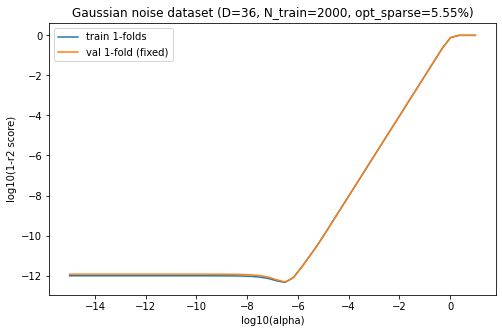

In [453]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(np.log10(alphas),np.log10(1-np.array(scores_train)),label="train 1-folds")
plt.plot(np.log10(alphas),np.log10(1-np.array(scores_val)),label="val 1-fold (fixed)")
plt.title("Gaussian noise dataset (D=36, N_train=2000, opt_sparse=5.55%)")
plt.xlabel("log10(alpha)")
plt.ylabel("log10(1-r2 score)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [-0.05637009 -0.04464164  0.09295276 ...  0.02545259  0.02606052
   0.04034337]
 [-0.06000263  0.05068012  0.01535029 ... -0.00259226 -0.03074792
  -0.0010777 ]
 [-0.04910502  0.05068012 -0.00512814 ...  0.07120998  0.06123763
  -0.03835666]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
 

iters taken: 2
end of custom algo run:
m:[1 1 1 1 1 1 1 1 1 1]
w:[-0.04366155 -0.23265029  0.2730981   0.19530638  0.05115039 -0.2229696
 -0.17362928  0.07755063  0.34455797  0.05895367]
m*w= [-0.04366155 -0.23265029  0.2730981   0.19530638  0.05115039 -0.2229696
 -0.17362928  0.07755063  0.34455797  0.05895367]
r2_val= 0.472653
sqloss_val= 931769.369042
one_norm= 1.673528
zero_norm= 10.000000


17
alpha= 5.736153
iter no.:
1
iter no.:
2
iters taken: 3
end of custom algo run:
m:[0 1 1 1 0 1 1 1 1 1]
w:[-0.04193255 -0.23320473  0.27286897  0.19508974  0.04912484 -0.22136059
 -0.17313837  0.07770121  0.34487348  0.05890582]
m*w= [-0.         -0.23320473  0.27286897  0.19508974  0.         -0.22136059
 -0.17313837  0.07770121  0.34487348  0.05890582]
r2_val= 0.470146
sqloss_val= 936199.769289
one_norm= 1.577143
zero_norm= 8.000000


18
alpha= 7.278954
iter no.:
1
iter no.:
2
iters taken: 3
end of custom algo run:
m:[0 1 1 1 0 1 1 1 1 1]
w:[-0.04193255 -0.23320473  0.27286897  0.19508974  

iter no.:
26
iter no.:
27
iter no.:
28
iter no.:
29
iter no.:
30
iter no.:
31
iter no.:
32
iter no.:
33
iter no.:
34
iter no.:
35
iter no.:
36
iter no.:
37
iter no.:
38
iter no.:
39
iter no.:
40
iter no.:
41
iter no.:
42
iter no.:
43
iter no.:
44
iter no.:
45
iter no.:
46
iter no.:
47
iter no.:
48
iter no.:
49
iter no.:
50
iter no.:
51
iter no.:
52
iter no.:
53
iter no.:
54
iter no.:
55
iter no.:
56
iter no.:
57
iter no.:
58
iter no.:
59
iter no.:
60
iter no.:
61
iter no.:
62
iter no.:
63
iter no.:
64
iter no.:
65
iter no.:
66
iter no.:
67
iter no.:
68
iter no.:
69
iter no.:
70
iter no.:
71
iter no.:
72
iter no.:
73
iter no.:
74
iter no.:
75
iter no.:
76
iter no.:
77
iter no.:
78
iter no.:
79
iter no.:
80
iter no.:
81
iter no.:
82
iter no.:
83
iter no.:
84
iter no.:
85
iter no.:
86
iter no.:
87
iter no.:
88
iter no.:
89
iter no.:
90
iter no.:
91
iter no.:
92
iter no.:
93
iter no.:
94
iter no.:
95
iter no.:
96
iter no.:
97
iter no.:
98
iter no.:
99
iter no.:
100
iters taken: 101
end of 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


iter no.:
81
iter no.:
82
iter no.:
83
iter no.:
84
iter no.:
85
iter no.:
86
iter no.:
87
iter no.:
88
iter no.:
89
iter no.:
90
iter no.:
91
iter no.:
92
iter no.:
93
iter no.:
94
iter no.:
95
iter no.:
96
iter no.:
97
iter no.:
98
iter no.:
99
iter no.:
100
iters taken: 101
end of custom algo run:
m:[0 0 0 0 0 0 0 0 1 0]
w:[-0.00579038 -0.03085398  0.1734987   0.02590145  0.00678354 -0.02957013
 -0.02302664  0.01028473  0.40489606  0.00781841]
m*w= [-0.         -0.          0.          0.          0.         -0.
 -0.          0.          0.40489606  0.        ]
r2_val= 0.291287
sqloss_val= 1252225.217075
one_norm= 0.404896
zero_norm= 1.000000




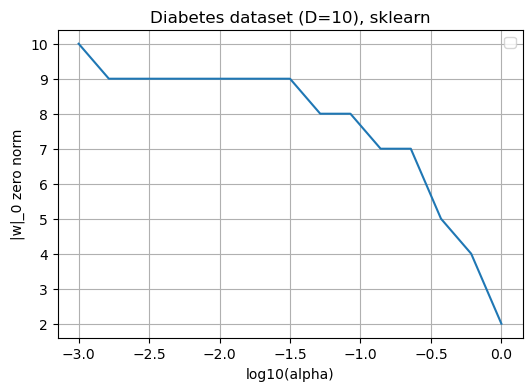

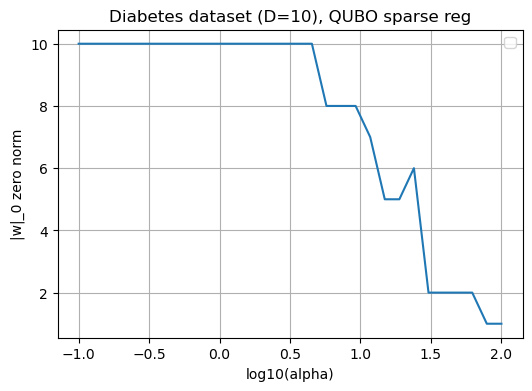

In [3]:
import time
from scipy import sparse
from scipy import linalg

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

from qubovert.sim import anneal_qubo
from qubovert import boolean_var

########################################################################
gamma=0.02

########################################################################


X_all, y_all = datasets.load_diabetes(return_X_y=True)
print(X_all.shape)

X_train = X_all[:150]
y_train = y_all[:150]

X = X_all[:150]
y = y_all[:150]

N = X.shape[0]
D = X.shape[1]

print(X)
print(y)

X_val = X_all[150:]
y_val = y_all[150:]

X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)
y_mean = np.mean(y)
y_std = np.std(y)

X = (X-X_mean)/X_std
y = (y-y_mean)/y_std

########################################################################

#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-3, 0, 15)

scores_train = []
scores_val = []
plot_y = []

for i in range(len(alphas)):
    print(i)
    print("alpha= %f"%alphas[i])
    lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_train_pred = np.matmul(X_train,lasso.coef_)+lasso.intercept_
    y_val_pred = np.matmul(X_val,lasso.coef_)+lasso.intercept_
    r2_train = lasso.score(X_train,y_train)
    r2_val = lasso.score(X_val,y_val)

    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train_calc = 1-SSres_train/SStot_train
    r2_val_calc = 1-SSres_val/SStot_val

    one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))

    #scores.append(r2_val)
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #scores_train.append(sqloss_train)
    #scores_val.append(sqloss_val)
    plot_y.append(zero_norm)
    
    print("w= %s"%(str(lasso.coef_)))
    print("r2_val= %f"%r2_val)
    print("r2_val_calc= %f"%r2_val_calc)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")

fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
#ax1.plot(np.log10(alphas),1-np.array(scores_train),label="train")
#ax1.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
ax1.plot(np.log10(alphas),plot_y)
ax1.set_title("Diabetes dataset (D=10), sklearn")
ax1.set_xlabel("log10(alpha)")
#ax1.set_ylabel("1-r2 score")
ax1.set_ylabel("|w|_0 zero norm")
ax1.grid()
ax1.legend()
fig1.savefig('lasso_f1.png')
#plt.show()

print("conventional lasso finished")
lasso = None
print("*"*128)
print("\n")

########################################################################


def update_m(X,y,w,alpha):
    m = {i: boolean_var('m(%d)' % i) for i in range(D)}

    A = np.linalg.multi_dot([np.diag(w),X.T,X,np.diag(w)])
    b = -2*np.linalg.multi_dot([np.diag(w),X.T,y])
    b = b + alpha*w*np.sign(w)

    model = 0
    for i in range(D):
        for j in range(D):
            model += m[i]*(A[i][j]+1e-9)*m[j]
        model += (b[i]+1e-9)*m[i]
        
    time_start = time.time()
    res = anneal_qubo(model, num_anneals=10)
    #print("Anneal time taken %f"%(time.time()-time_start))
    model_solution = res.best.state
    #print("Model value:", res.best.value)
    #print("Model value + yT.y:", res.best.value+np.dot(y,y))
    
    m = np.array(list(model_solution.values()))
    return(m)


def predict(mw):
    X_all, y_all = datasets.load_diabetes(return_X_y=True)
    print(X_all.shape)

    X_train = X_all[:150]
    y_train = y_all[:150]

    X = X_all[:150]
    y = y_all[:150]

    N = X.shape[0]
    D = X.shape[1]

    print(X)
    print(y)

    X_val = X_all[150:]
    y_val = y_all[150:]

    X_mean = np.mean(X,axis=0)
    X_std = np.std(X,axis=0)
    y_mean = np.mean(y)
    y_std = np.std(y)

    X = (X-X_mean)/X_std
    y = (y-y_mean)/y_std

    y_train_pred = np.matmul(X,mw)*y_std+y_mean
    y_val_pred = np.matmul((X_val-X_mean)/X_std,mw)*y_std+y_mean
    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train = 1-SSres_train/SStot_train
    r2_val = 1-SSres_val/SStot_val
    
    one_norm = np.matmul(np.abs(mw),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(mw)>0,1,0),np.ones(D))
    
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    plot_y.append(zero_norm)
    
    print("m*w= %s"%(str(mw)))
    print("r2_val= %f"%r2_val)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")


def custom_algo(X,y,alpha,gamma=0.02,max_iters=100):
    #max_time
    #alpha = 20.0
    #gamma=0.5

    #N = X.shape[0]
    D = X.shape[1]

    m_prev = np.ones(D)
    m = np.ones(D)
    #print(m)
    w_prev = np.zeros(D)
    w = np.linalg.multi_dot([np.diag(m),X.T,X,np.diag(m)])
    w = np.linalg.multi_dot([np.linalg.inv(w),np.diag(m),X.T,y])
    #print(w)

    t = 1
    step_change = np.linalg.norm(m*w-m_prev*w_prev)
    while step_change > 0.001:
    #alternatively: use time condition. "Must not spend more than x seconds"
        #print(t)
        print("iter no.:")
        print(t)
        m_prev = m.copy()
        m = update_m(X,y,w,alpha)
        #print(m_prev)
        #print(m)
        
        w_prev = w.copy()
        w = np.linalg.multi_dot([np.diag(m),X.T,X,np.diag(m)])
        w = np.linalg.multi_dot([np.linalg.inv(w+np.eye(D)*1e-9),np.diag(m),X.T,y])
        w = (1-gamma)*w_prev + gamma*w
        # w itself should not be sparse.
        # It should be the optimal weights given some sparsity defined by m.
        #w = (1-gamma*m)*w_prev + gamma*m*w
        #w = (1-gamma)*w_prev + gamma*m*w + gamma*(1-gamma)*(1-m)*w
        #print(w_prev)
        #print(w)
        #predict(m*w)
        
        step_change = np.linalg.norm(m*w-m_prev*w_prev)
        t += 1
        #print(step_change)
        #print('\n')
        if t>max_iters:
            break

    print('iters taken: %d'%t)

    print("end of custom algo run:")
    print("m:%s"%str(m))
    print("w:%s"%str(w))
    return(m*w) 
    #should return m*w because in the overall formulation 
    #it is m*w that is optimized wrt the objective.
    #return(w)


alphas = np.logspace(-1, 2, 30)
#alphas = np.array([15.0])

scores_train = []
scores_val = []
plot_y = np.zeros(30)

for i in range(len(alphas)):
    print(i)
    print("alpha= %f"%alphas[i])

    mw = custom_algo(X,y,alphas[i],gamma)
    y_train_pred = np.matmul(X,mw)*y_std+y_mean
    y_val_pred = np.matmul((X_val-X_mean)/X_std,mw)*y_std+y_mean
    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train = 1-SSres_train/SStot_train
    r2_val = 1-SSres_val/SStot_val
    
    one_norm = np.matmul(np.abs(mw),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(mw)>0,1,0),np.ones(D))
    #print(zero_norm)
    
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #plot_y.append(zero_norm)
    plot_y[i] = zero_norm
    #print(plot_y)
    
    print("m*w= %s"%(str(mw)))
    print("r2_val= %f"%r2_val)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")

fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
#ax2.plot(np.log10(alphas),1-np.array(scores_train),label="train")
#ax2.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
ax2.plot(np.log10(alphas),plot_y)
ax2.set_title("Diabetes dataset (D=10), QUBO sparse reg")
ax2.set_xlabel("log10(alpha)")
#ax2.set_ylabel("1-r2 score")
ax2.set_ylabel("|w|_0 zero norm")
ax2.grid()
ax2.legend()
fig2.savefig('lasso_f2.png')


In [ ]:
#run 1729

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
alpha= 0.001000
w= [ 8.63160749e-01 -8.93121778e-01  5.76095614e-01  1.06664990e+00
 -0.00000000e+00 -1.75723434e+00 -1.12640504e+00 -1.28361132e+00
 -1.66939074e-05 -1.27790252e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.37495152e-02  2.37128205e-01  0.00000000e+00
  0.00000000e+00  1.84847491e-02  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -3.65991600e-02  6.06339747e-02  0.00000000e+00 -6.38572207e-02
  0.00000000e+00 -2.42471068e-02 -5.58741908e-02 -1.53963761e-01
 -8.67042337e-02 -0.00000000e+00 -0.00000000e+00  5.31253138e-04
 -0.00000000e+00 -1.40368317e-03  7.24410337e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.51377341e-02  0.00000000e+00
 -5.06200866e-02 -0.00000000e+00  1.44736674e-02 -0.00000000e+00
  0.00000000e+00 -1.26324532e-02  7.25496632e-04  0.00000000e+00
  0.00000000e+00  1.35019279e-01  1.99520029e-02 -1.16998385e-02
  6.86971355e-02 -9.76708796e-02 -0.00000000e+00  0.00000000e+00
  6.

m*w= [ 0.          0.          0.          0.          0.          0.50677221
 -0.07732378  0.          0.          0.03441624  0.          0.80671984
  0.          0.          0.          0.          0.08532481  0.
  0.          0.         -0.07362303  0.          0.39000823 -0.66688112
  0.          0.          0.          0.02744056  0.          0.
  0.          0.          0.          0.          0.          0.
  0.81652831  0.          0.          0.48027338  0.          0.
  0.          0.          0.         -0.26148352  0.          0.
  0.          0.          0.          0.84946859  0.          0.
  0.          0.          0.          0.          0.          0.
  0.57532536 -0.55430456  0.          0.          0.          0.
  0.          0.         -0.45089006  0.          0.          0.42724363
  0.          0.          0.          0.          0.          0.
  0.31468297  0.22417908  0.          1.60901529  0.          0.
  0.          0.          0.3087701   0.         -0.1

m*w= [ 0.          0.          0.          0.          0.          0.
  0.13377764  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.23851804  0.
  0.          0.          0.          0.          0.         -0.0631341
 -0.5552633   0.12109682  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.07976587  0.          0.          0.
  0.          0.          0.          0.55748906  0.         -0.08506471
  0.          0.          0.          0.         -0.033453    0.
  0.         -0.59038318  0.          0.          0.          0.
  0.          0.          0.          0.         -0.28665733  0.
  0.          0.          0.          0.          0.          0.
 -0.17811032 -0.01968547  0.          0.          0.          0.
  0.          0.          0.          0.          0.20878961 -0.104214

m*w= [ 0.          0.          0.38717365  0.          0.          0.
 -0.24600601  0.          0.          0.          0.          0.
  0.10252631  0.          0.4658376   0.          0.          0.
 -0.05502023  0.          0.15114856  0.1949439  -0.37646818 -0.29062402
  0.          0.          0.          0.22623199  0.          0.
  0.30073655  0.         -0.5007503   0.         -0.53505816  0.
  0.          0.          0.          0.          0.          0.
 -0.15301621  0.32941377  0.1337328   0.          0.         -0.09511989
  0.55118549  0.          0.          0.         -0.4760437   0.
  0.          0.          0.         -0.0572567   0.          0.
  0.         -0.35930693  0.1875087   0.         -0.07270139  0.
 -0.13993382  0.          0.          0.          0.          0.
  0.          0.          0.          0.25088549  0.22560745  0.
 -0.08404589 -0.14695239  0.04288638  0.          0.30529284  0.
  0.         -0.6160121   0.          0.18223035  0.37353861  0.13434

m*w= [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.14414047  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.24329574
  0.        

m*w= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626]
r2_train= 0.000000
r2_val= -0.003010
sqloss_val= 10332.512216
one_norm= 0.000000
zero_norm= 0.000000


23
alpha= 23.950266
m*w= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


m*w= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626
 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626 0.06806626]
r2_train= 0.000000
r2_val= -0.003010
sqloss_val= 10332.512216
one_norm= 0.000000
zero_norm= 0.000000




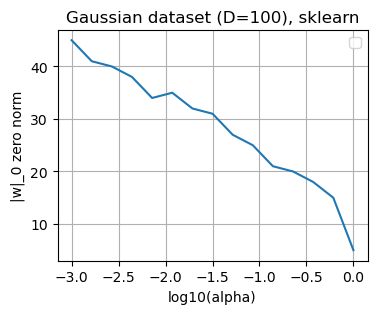

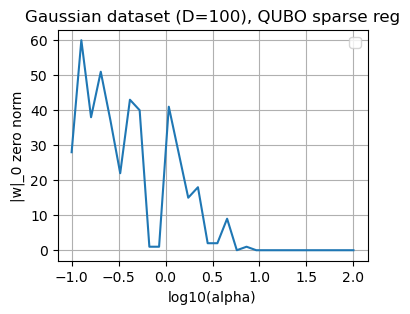

In [15]:
import time
from scipy import sparse
from scipy import linalg

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

from qubovert.sim import anneal_qubo
from qubovert import boolean_var

########################################################################
#gamma=0.02
#gamma = 1.0

########################################################################

#dataset = "diabetes"
dataset = "sparse_coding"

if dataset == "diabetes":
    #gamma=0.02
    gamma = 1.0
    X_all, y_all = datasets.load_diabetes(return_X_y=True)
    print(X_all.shape)

    X_train = X_all[:150]
    y_train = y_all[:150]

    X = X_all[:150]
    y = y_all[:150]
    
    X_val = X_all[150:]
    y_val = y_all[150:]

elif dataset == "sparse_coding":
    gamma = 1.0
    np.random.seed(42)

    N_train = 36
    N_val = 720
    N_test = 36
    N = N_train+N_val+N_test

    D = 100
    D_small = 10
    mu, sigma = 0, 1.0

    X_all = np.random.normal(mu, sigma, size=(N,D))
    X_small = np.random.normal(mu, sigma, size=(N,D_small))
    w_opt = np.random.normal(mu,sigma,size=D_small)
    y_all = np.matmul(X_small,w_opt)

    X_all[:,:D_small] = X_small
    X_train = X_all[:N_train]
    X_val = X_all[N_train:N_train+N_val]
    X_test = X_all[N_train+N_val:]

    y_train = y_all[:N_train]
    y_val = y_all[N_train:N_train+N_val]
    y_test = y_all[N_train+N_val:]

    X = X_all[:N_train]
    y = y_all[:N_train]


N = X.shape[0]
D = X.shape[1]

X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)
y_mean = np.mean(y)
y_std = np.std(y)

X = (X-X_mean)/X_std
y = (y-y_mean)/y_std

########################################################################

#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-3, 0, 15)

scores_train = []
scores_val = []
plot_y = []

for i in range(len(alphas)):
    print(i)
    print("alpha= %f"%alphas[i])
    lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_train_pred = np.matmul(X_train,lasso.coef_)+lasso.intercept_
    y_val_pred = np.matmul(X_val,lasso.coef_)+lasso.intercept_
    r2_train = lasso.score(X_train,y_train)
    r2_val = lasso.score(X_val,y_val)

    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train_calc = 1-SSres_train/SStot_train
    r2_val_calc = 1-SSres_val/SStot_val

    one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))

    #scores.append(r2_val)
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #scores_train.append(sqloss_train)
    #scores_val.append(sqloss_val)
    plot_y.append(zero_norm)
    
    print("w= %s"%(str(lasso.coef_)))
    print("r2_train= %f"%r2_train)
    print("r2_val= %f"%r2_val)
    print("r2_val_calc= %f"%r2_val_calc)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")

fig1 = plt.figure(figsize=(4,3))
ax1 = fig1.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
#ax1.plot(np.log10(alphas),1-np.array(scores_train),label="train")
#ax1.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
ax1.plot(np.log10(alphas),plot_y)
ax1.set_title("Gaussian dataset (D=100), sklearn")
ax1.set_xlabel("log10(alpha)")
#ax1.set_ylabel("1-r2 score")
ax1.set_ylabel("|w|_0 zero norm")
ax1.grid()
ax1.legend()
fig1.savefig('lasso_f1.png')
#plt.show()

print("conventional lasso finished")
lasso = None
print("*"*128)
print("\n")

########################################################################


def update_m(X,y,w,alpha):
    m = {i: boolean_var('m(%d)' % i) for i in range(D)}

    A = np.linalg.multi_dot([np.diag(w),X.T,X,np.diag(w)])
    b = -2*np.linalg.multi_dot([np.diag(w),X.T,y])
    b = b + alpha*w*np.sign(w)

    model = 0
    for i in range(D):
        for j in range(D):
            model += m[i]*(A[i][j]+1e-9)*m[j]
        model += (b[i]+1e-9)*m[i]
        
    time_start = time.time()
    res = anneal_qubo(model, num_anneals=10)
    #print("Anneal time taken %f"%(time.time()-time_start))
    model_solution = res.best.state
    #print("Model value:", res.best.value)
    #print("Model value + yT.y:", res.best.value+np.dot(y,y))
    
    m = np.array(list(model_solution.values()))
    return(m)


def predict(mw):
    X_all, y_all = datasets.load_diabetes(return_X_y=True)
    print(X_all.shape)

    X_train = X_all[:150]
    y_train = y_all[:150]

    X = X_all[:150]
    y = y_all[:150]

    N = X.shape[0]
    D = X.shape[1]

    print(X)
    print(y)

    X_val = X_all[150:]
    y_val = y_all[150:]

    X_mean = np.mean(X,axis=0)
    X_std = np.std(X,axis=0)
    y_mean = np.mean(y)
    y_std = np.std(y)

    X = (X-X_mean)/X_std
    y = (y-y_mean)/y_std

    y_train_pred = np.matmul(X,mw)*y_std+y_mean
    y_val_pred = np.matmul((X_val-X_mean)/X_std,mw)*y_std+y_mean
    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train = 1-SSres_train/SStot_train
    r2_val = 1-SSres_val/SStot_val
    
    one_norm = np.matmul(np.abs(mw),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(mw)>0,1,0),np.ones(D))
    
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    plot_y.append(zero_norm)
    
    print("m*w= %s"%(str(mw)))
    print(y_train_pred)
    print("r2_train= %f"%r2_train)
    print("r2_val= %f"%r2_val)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")


def custom_algo(X,y,alpha,gamma=0.02,max_iters=100):
    #max_time
    #alpha = 20.0
    #gamma=0.5

    #N = X.shape[0]
    D = X.shape[1]

    m_prev = np.ones(D)
    m = np.ones(D)
    #print(m)
    w_prev = np.zeros(D)
    w = np.linalg.multi_dot([np.diag(m),X.T,X,np.diag(m)])
    w = np.linalg.multi_dot([np.linalg.inv(w),np.diag(m),X.T,y])
    #print(w)

    t = 1
    step_change = np.linalg.norm(m*w-m_prev*w_prev)
    while step_change > 0.001:
    #alternatively: use time condition. "Must not spend more than x seconds"
        #print(t)
        #print("iter no.:")
        #print(t)
        m_prev = m.copy()
        m = update_m(X,y,w,alpha)
        #print(m_prev)
        #print(m)
        
        w_prev = w.copy()
        w = np.linalg.multi_dot([np.diag(m),X.T,X,np.diag(m)])
        w = np.linalg.multi_dot([np.linalg.inv(w+np.eye(D)*1e-9),np.diag(m),X.T,y])
        w = (1-gamma)*w_prev + gamma*w
        # w itself should not be sparse.
        # It should be the optimal weights given some sparsity defined by m.
        #w = (1-gamma*m)*w_prev + gamma*m*w
        #w = (1-gamma)*w_prev + gamma*m*w + gamma*(1-gamma)*(1-m)*w
        #print(w_prev)
        #print(w)
        #predict(m*w)
        
        step_change = np.linalg.norm(m*w-m_prev*w_prev)
        t += 1
        #print(step_change)
        #print('\n')
        if t>max_iters:
            break

    #print('iters taken: %d'%t)

    #print("end of custom algo run:")
    #print("m:%s"%str(m))
    #print("w:%s"%str(w))
    return(m*w) 
    #should return m*w because in the overall formulation 
    #it is m*w that is optimized wrt the objective.
    #return(w)


alphas = np.logspace(-1, 2, 30)
#alphas = np.array([15.0])

scores_train = []
scores_val = []
plot_y = np.zeros(30)

for i in range(len(alphas)):
    print(i)
    print("alpha= %f"%alphas[i])

    mw = custom_algo(X,y,alphas[i],gamma)
    y_train_pred = np.matmul(X,mw)*y_std+y_mean
    y_val_pred = np.matmul((X_val-X_mean)/X_std,mw)*y_std+y_mean
    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train = 1-SSres_train/SStot_train
    r2_val = 1-SSres_val/SStot_val
    
    one_norm = np.matmul(np.abs(mw),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(mw)>0,1,0),np.ones(D))
    #print(zero_norm)
    
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #plot_y.append(zero_norm)
    plot_y[i] = zero_norm
    #print(plot_y)
    
    print("m*w= %s"%(str(mw)))
    print(y_train_pred)
    print("r2_train= %f"%r2_train)
    print("r2_val= %f"%r2_val)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")

fig2 = plt.figure(figsize=(4,3))
ax2 = fig2.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
#ax2.plot(np.log10(alphas),1-np.array(scores_train),label="train")
#ax2.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
ax2.plot(np.log10(alphas),plot_y)
ax2.set_title("Gaussian dataset (D=100), QUBO sparse reg")
ax2.set_xlabel("log10(alpha)")
#ax2.set_ylabel("1-r2 score")
ax2.set_ylabel("|w|_0 zero norm")
ax2.grid()
ax2.legend()
fig2.savefig('lasso_f2.png')



In [72]:
len(alphas)

1

In [71]:
scores_train

[0.5062565865469522,
 0.5063483849826922,
 0.5064365482003768,
 0.5065212201546412,
 0.5066025390995169,
 0.5066806378141757,
 0.506755643819734,
 0.5068276795874723,
 0.5068968627388082,
 0.5069633062373515,
 0.5070271185733524,
 0.5070884039408478,
 0.5071472624077904,
 0.5072037900794422,
 0.5072037900794422]

In [66]:
alphas

array([15.])

In [67]:
plot_y

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

In [18]:
from qubovert import boolean_var

N = 10

# create the variables
x = {i: boolean_var('x(%d)' % i) for i in range(N)}

# minimize \sum_{i=0}^{N-2} (1-2x_{i}) x_{i+1}
model = 0
for i in range(N-1):
    model += (1 - 2 * x[i]) * x[i+1]

In [19]:
x

{0: {('x(0)',): 1},
 1: {('x(1)',): 1},
 2: {('x(2)',): 1},
 3: {('x(3)',): 1},
 4: {('x(4)',): 1},
 5: {('x(5)',): 1},
 6: {('x(6)',): 1},
 7: {('x(7)',): 1},
 8: {('x(8)',): 1},
 9: {('x(9)',): 1}}

In [20]:
x[0][('x(0)',)]

1

In [21]:
type(list(x[0].keys())[0][0])

str

In [22]:
model

{('x(0)', 'x(1)'): -2,
 ('x(1)',): 1,
 ('x(1)', 'x(2)'): -2,
 ('x(2)',): 1,
 ('x(2)', 'x(3)'): -2,
 ('x(3)',): 1,
 ('x(3)', 'x(4)'): -2,
 ('x(4)',): 1,
 ('x(4)', 'x(5)'): -2,
 ('x(5)',): 1,
 ('x(5)', 'x(6)'): -2,
 ('x(6)',): 1,
 ('x(6)', 'x(7)'): -2,
 ('x(7)',): 1,
 ('x(7)', 'x(8)'): -2,
 ('x(8)',): 1,
 ('x(8)', 'x(9)'): -2,
 ('x(9)',): 1}

In [23]:
N=100
x = {i: boolean_var('x(%d)' % i) for i in range(N)}

In [24]:
A = -np.ones((N,N))
b = np.zeros(N)

In [26]:
A[0][0] = 200

In [27]:

model = 0
for i in range(N):
    #print(i)
    for j in range(N):
        model += x[i]*A[i][j]*x[j]
    model += b[i]*x[i]
    
#print(model)

In [29]:
model_solution = model.solve_bruteforce()
print("Variable assignment:", model_solution)
print("Model value:", model.value(model_solution))
print("Constraints satisfied?", model.is_solution_valid(model_solution))

KeyboardInterrupt: 

In [30]:
from qubovert.sim import anneal_qubo

time_start = time.time()
res = anneal_qubo(model, num_anneals=10)
print("Anneal time taken %f"%(time.time()-time_start))
model_solution = res.best.state

print("Variable assignment:", model_solution)
print("Model value:", res.best.value)
print("Constraints satisfied?", model.is_solution_valid(model_solution))

Anneal time taken 0.184067
Variable assignment: {'x(0)': 0, 'x(1)': 1, 'x(2)': 1, 'x(3)': 1, 'x(4)': 1, 'x(5)': 1, 'x(6)': 1, 'x(7)': 1, 'x(8)': 1, 'x(9)': 1, 'x(10)': 1, 'x(11)': 1, 'x(12)': 1, 'x(13)': 1, 'x(14)': 1, 'x(15)': 1, 'x(16)': 1, 'x(17)': 1, 'x(18)': 1, 'x(19)': 1, 'x(20)': 1, 'x(21)': 1, 'x(22)': 1, 'x(23)': 1, 'x(24)': 1, 'x(25)': 1, 'x(26)': 1, 'x(27)': 1, 'x(28)': 1, 'x(29)': 1, 'x(30)': 1, 'x(31)': 1, 'x(32)': 1, 'x(33)': 1, 'x(34)': 1, 'x(35)': 1, 'x(36)': 1, 'x(37)': 1, 'x(38)': 1, 'x(39)': 1, 'x(40)': 1, 'x(41)': 1, 'x(42)': 1, 'x(43)': 1, 'x(44)': 1, 'x(45)': 1, 'x(46)': 1, 'x(47)': 1, 'x(48)': 1, 'x(49)': 1, 'x(50)': 1, 'x(51)': 1, 'x(52)': 1, 'x(53)': 1, 'x(54)': 1, 'x(55)': 1, 'x(56)': 1, 'x(57)': 1, 'x(58)': 1, 'x(59)': 1, 'x(60)': 1, 'x(61)': 1, 'x(62)': 1, 'x(63)': 1, 'x(64)': 1, 'x(65)': 1, 'x(66)': 1, 'x(67)': 1, 'x(68)': 1, 'x(69)': 1, 'x(70)': 1, 'x(71)': 1, 'x(72)': 1, 'x(73)': 1, 'x(74)': 1, 'x(75)': 1, 'x(76)': 1, 'x(77)': 1, 'x(78)': 1, 'x(79)': 1, '

In [35]:
np.array(list(model_solution.values()))

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
list(model_solution.values()).count(1)

99

# Custom algorithm

In [10]:
from qubovert.sim import anneal_qubo
from qubovert import boolean_var


X_all, y_all = datasets.load_diabetes(return_X_y=True)
print(X_all.shape)


X = X_all[:150]
y = y_all[:150]
N = X.shape[0]
D = X.shape[1]

print(X)
print(y)

X_val = X_all[150:200]
y_val = y_all[150:200]

X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)
y_mean = np.mean(y)
y_std = np.std(y)

X = (X-X_mean)/X_std
y = (y-y_mean)/y_std


(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [-0.05637009 -0.04464164  0.09295276 ...  0.02545259  0.02606052
   0.04034337]
 [-0.06000263  0.05068012  0.01535029 ... -0.00259226 -0.03074792
  -0.0010777 ]
 [-0.04910502  0.05068012 -0.00512814 ...  0.07120998  0.06123763
  -0.03835666]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
 

In [11]:
alpha = 10.0
gamma=0.02

m_prev = np.ones(D)
m = np.ones(D)
print(m)
w_prev = np.zeros(D)
w = np.linalg.multi_dot([np.diag(m),X.T,X,np.diag(m)])
w = np.linalg.multi_dot([np.linalg.inv(w),np.diag(m),X.T,y])
print(w)

t = 1
step_change = np.linalg.norm(m*w-m_prev*w_prev)
while step_change > 0.001:
    print(t)
    A = np.linalg.multi_dot([np.diag(w),X.T,X,np.diag(w)])
    b = -2*np.linalg.multi_dot([np.diag(w),X.T,y])
    b = b + alpha*w*np.sign(w)
    
    #print(A)
    #print(b)
    
    m_prev = m.copy()
    m = {i: boolean_var('m(%d)' % i) for i in range(D)}
    model = 0
    for i in range(D):
        for j in range(D):
            model += m[i]*(A[i][j]+1e-9)*m[j]
        model += (b[i]+1e-9)*m[i]
        
    time_start = time.time()
    res = anneal_qubo(model, num_anneals=10)
    print("Anneal time taken %f"%(time.time()-time_start))
    model_solution = res.best.state
    print("Model value:", res.best.value)
    print("Model value + yT.y:", res.best.value+np.dot(y,y))
        
    m = np.array(list(model_solution.values()))
    print(m_prev)
    print(m)
    
    w_prev = w.copy()
    w = np.linalg.multi_dot([np.diag(m),X.T,X,np.diag(m)])
    w = np.linalg.multi_dot([np.linalg.inv(w+np.eye(D)*1e-9),np.diag(m),X.T,y])
    #w = (1-gamma)*w_prev + gamma*m*w + gamma*(1-gamma)*(1-m)*w
    w = (1-gamma)*w_prev + gamma*m*w
    print(w_prev)
    print(w)
    
    step_change = np.linalg.norm(m*w-m_prev*w_prev)
    t += 1
    print(step_change)
    print('\n')
    

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-0.04366155 -0.23265029  0.2730981   0.19530638  0.05115039 -0.2229696
 -0.17362928  0.07755063  0.34455797  0.05895367]
1
Anneal time taken 0.004099
Model value: -63.73173009546194
Model value + yT.y: 86.26826990453806
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 1 1 0 0 1 0 1 0]
[-0.04366155 -0.23265029  0.2730981   0.19530638  0.05115039 -0.2229696
 -0.17362928  0.07755063  0.34455797  0.05895367]
[-0.04278832 -0.23330001  0.27257812  0.1951092   0.05012738 -0.21851021
 -0.17432421  0.07599962  0.34522792  0.0577746 ]
0.2524468967499726


2
Anneal time taken 0.003708
Model value: -63.73309340419097
Model value + yT.y: 86.26690659580903
[0 1 1 1 0 0 1 0 1 0]
[0 1 1 1 0 0 1 0 1 0]
[-0.04278832 -0.23330001  0.27257812  0.1951092   0.05012738 -0.21851021
 -0.17432421  0.07599962  0.34522792  0.0577746 ]
[-0.04193255 -0.23393672  0.27206853  0.19491596  0.04912484 -0.21414001
 -0.17500525  0.07447963  0.34588447  0.05661911]
0.0012638416678815594


3
Anneal time 

# Alternative method with qubovert

In [50]:
from qubovert import QUBO

In [51]:
N=2000

In [52]:
A = np.ones((N,N))
b = np.ones(N)

In [53]:
A_dict = {}

In [54]:
for i in range(N):
    for j in range(N):
        A_dict[('x(%d)'%(i),'x(%d)'%(j))] = A[i][j]

In [55]:
len(A_dict)

4000000

In [56]:
qubo = QUBO(A_dict)

In [57]:
qubo

{('x(0)',): 1.0,
 ('x(0)', 'x(1)'): 2.0,
 ('x(0)', 'x(2)'): 2.0,
 ('x(0)', 'x(3)'): 2.0,
 ('x(0)', 'x(4)'): 2.0,
 ('x(0)', 'x(5)'): 2.0,
 ('x(0)', 'x(6)'): 2.0,
 ('x(0)', 'x(7)'): 2.0,
 ('x(0)', 'x(8)'): 2.0,
 ('x(0)', 'x(9)'): 2.0,
 ('x(0)', 'x(10)'): 2.0,
 ('x(0)', 'x(11)'): 2.0,
 ('x(0)', 'x(12)'): 2.0,
 ('x(0)', 'x(13)'): 2.0,
 ('x(0)', 'x(14)'): 2.0,
 ('x(0)', 'x(15)'): 2.0,
 ('x(0)', 'x(16)'): 2.0,
 ('x(0)', 'x(17)'): 2.0,
 ('x(0)', 'x(18)'): 2.0,
 ('x(0)', 'x(19)'): 2.0,
 ('x(0)', 'x(20)'): 2.0,
 ('x(0)', 'x(21)'): 2.0,
 ('x(0)', 'x(22)'): 2.0,
 ('x(0)', 'x(23)'): 2.0,
 ('x(0)', 'x(24)'): 2.0,
 ('x(0)', 'x(25)'): 2.0,
 ('x(0)', 'x(26)'): 2.0,
 ('x(0)', 'x(27)'): 2.0,
 ('x(0)', 'x(28)'): 2.0,
 ('x(0)', 'x(29)'): 2.0,
 ('x(0)', 'x(30)'): 2.0,
 ('x(0)', 'x(31)'): 2.0,
 ('x(0)', 'x(32)'): 2.0,
 ('x(0)', 'x(33)'): 2.0,
 ('x(0)', 'x(34)'): 2.0,
 ('x(0)', 'x(35)'): 2.0,
 ('x(0)', 'x(36)'): 2.0,
 ('x(0)', 'x(37)'): 2.0,
 ('x(0)', 'x(38)'): 2.0,
 ('x(0)', 'x(39)'): 2.0,
 ('x(0)', 'x(40)'

In [58]:
Q = qubo.to_qubo()

In [59]:
Q

{(0,): 1.0,
 (0, 1): 2.0,
 (0, 2): 2.0,
 (0, 3): 2.0,
 (0, 4): 2.0,
 (0, 5): 2.0,
 (0, 6): 2.0,
 (0, 7): 2.0,
 (0, 8): 2.0,
 (0, 9): 2.0,
 (0, 10): 2.0,
 (0, 11): 2.0,
 (0, 12): 2.0,
 (0, 13): 2.0,
 (0, 14): 2.0,
 (0, 15): 2.0,
 (0, 16): 2.0,
 (0, 17): 2.0,
 (0, 18): 2.0,
 (0, 19): 2.0,
 (0, 20): 2.0,
 (0, 21): 2.0,
 (0, 22): 2.0,
 (0, 23): 2.0,
 (0, 24): 2.0,
 (0, 25): 2.0,
 (0, 26): 2.0,
 (0, 27): 2.0,
 (0, 28): 2.0,
 (0, 29): 2.0,
 (0, 30): 2.0,
 (0, 31): 2.0,
 (0, 32): 2.0,
 (0, 33): 2.0,
 (0, 34): 2.0,
 (0, 35): 2.0,
 (0, 36): 2.0,
 (0, 37): 2.0,
 (0, 38): 2.0,
 (0, 39): 2.0,
 (0, 40): 2.0,
 (0, 41): 2.0,
 (0, 42): 2.0,
 (0, 43): 2.0,
 (0, 44): 2.0,
 (0, 45): 2.0,
 (0, 46): 2.0,
 (0, 47): 2.0,
 (0, 48): 2.0,
 (0, 49): 2.0,
 (0, 50): 2.0,
 (0, 51): 2.0,
 (0, 52): 2.0,
 (0, 53): 2.0,
 (0, 54): 2.0,
 (0, 55): 2.0,
 (0, 56): 2.0,
 (0, 57): 2.0,
 (0, 58): 2.0,
 (0, 59): 2.0,
 (0, 60): 2.0,
 (0, 61): 2.0,
 (0, 62): 2.0,
 (0, 63): 2.0,
 (0, 64): 2.0,
 (0, 65): 2.0,
 (0, 66): 2.0,
 (0, 67

In [60]:
type(Q)

qubovert.utils._qubomatrix.QUBOMatrix

In [61]:
from qubovert.sim import anneal_qubo

res = anneal_qubo(Q, num_anneals=1)
model_solution = res.best.state

print("Variable assignment:", model_solution)
print("Model value:", res.best.value)
print("Constraints satisfied?", model.is_solution_valid(model_solution))

Variable assignment: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 

# Misc

In [4]:


X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

(0.0001, 0.31622776601683794)

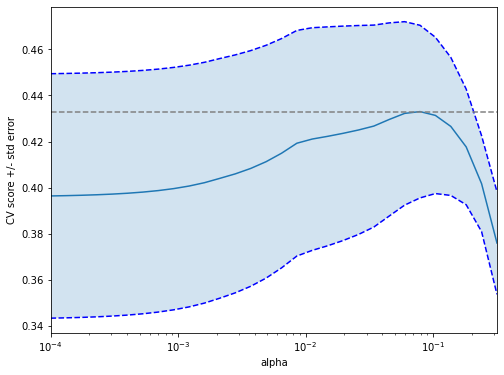

In [5]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [8]:
scores

array([0.39638051, 0.39650624, 0.39667201, 0.39689044, 0.39717807,
       0.39755659, 0.39805404, 0.39870708, 0.3995624 , 0.40067986,
       0.40213502, 0.40402065, 0.40596304, 0.40831427, 0.41123993,
       0.41489967, 0.41926122, 0.42107802, 0.42225458, 0.42355432,
       0.42500251, 0.42670708, 0.42957468, 0.43220641, 0.43298992,
       0.43133725, 0.42655766, 0.41766182, 0.4017079 , 0.3759415 ])

In [9]:
alphas

array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])